# Machine Learning Programming Assignment I

# Import the data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from sklearn import linear_model
from sklearn.datasets import make_regression

from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV,ElasticNet

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot
import seaborn as sns


In [3]:
with open("winequality.names") as f:
    print(f.read())

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 016

In [4]:
#Read csv files
red = pd.read_csv("winequality-red.csv", delimiter=';')
white = pd.read_csv("winequality-white.csv", delimiter=';')

In [5]:
#Substitute spaces in column names for _
red.columns = red.columns.str.replace(' ','_')
white.columns = red.columns.str.replace(' ','_')

In [6]:
red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# 1 Data

## Red wine

In [8]:
red.shape

(1599, 12)

In [9]:
red.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
#Data types of the features
red.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [11]:
#Check for missing values
red.isnull().sum(axis = 0) 

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f939d080f90>,
      dtype=object)

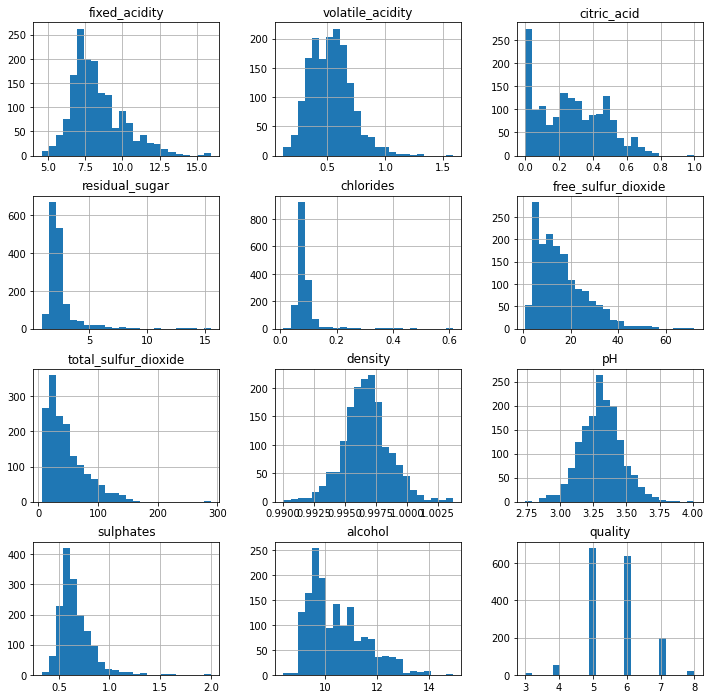

In [12]:
#Histogram of frequency distribution of features
red.hist(bins=24,figsize=(12,12)) 

These features values will be scaling later on the linear regression.

In [13]:
# The correlation coefficient matrix
red.corr().style.background_gradient(cmap='Blues')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


There is a greatest influence on free sulfur dioxide and total sulfur dioxide, which has a correlation coefficient of approximately 0.67.
The following figure shows the relationship between them.

Text(0.5, 1.0, 'The relationship between free sulfur dioxide and total sulfur dioxide')

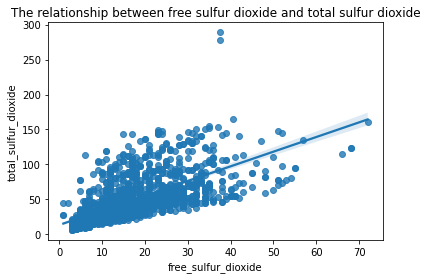

In [14]:
# The plot of relationship between free sulfur dioxide and total sulfur dioxide
plt.figure()
sns.regplot(x = 'free_sulfur_dioxide',y = 'total_sulfur_dioxide',data = red)
plt.title('The relationship between free sulfur dioxide and total sulfur dioxide')

The correlation coefficient matrix shows that volatile acidity and alcohol have a strong influence on the quality of red wine. 
The following figure shows the relationship between them.

Text(0.5, 1.0, 'Scatter plots of quality, alcohol, and volatile acidity of red wine')

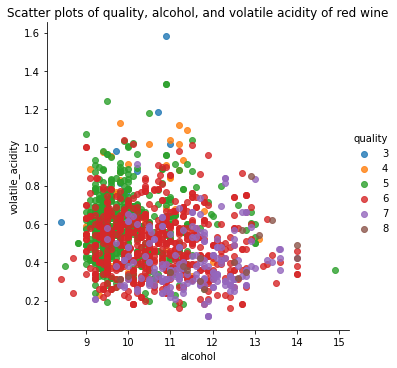

In [15]:
# Scatter plots of quality, alcohol, and volatile acidity of red wine
sns.lmplot (x = 'alcohol',y = 'volatile_acidity',hue = 'quality',
            data = red,fit_reg = False)
plt.title('Scatter plots of quality, alcohol, and volatile acidity of red wine')

Red wine:

The correlation coefficient matrix shows that volatile acidity and alcohol have a strong influence on the quality of red wine. The greatest influence on wine quality is the wine is alcohol, which has a correlation coefficient of approximately 0.48.
* Most of the red wines its quality in the middle
* Alcohol is positively correlated with quality, with the higher the degree the higher the quality tends to increase
* Volatile acids are negatively correlated with quality, the higher the acidity the lower the quality tends to be
* The higher the free sulphur dioxide, the higher the total sulphur dioxide




## White wine

In [16]:
white.shape

(4898, 12)

In [17]:
white.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [18]:
#Data types of the features
white.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [19]:
#Check for missing values
white.isnull().sum(axis = 0) 

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93996ed110>,
      dtype=object)

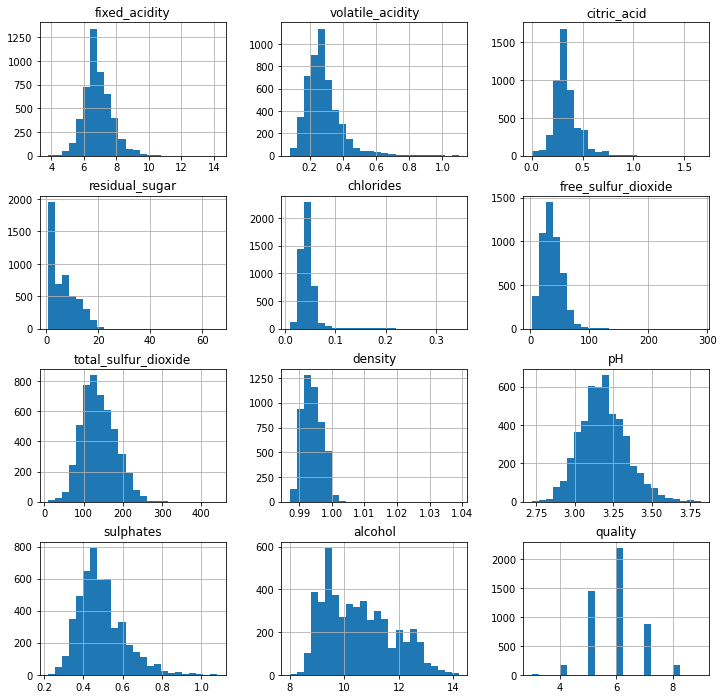

In [20]:
#Histogram of frequency distribution of features
white.hist(bins=24,figsize=(12,12)) 

These features values will be scaling later on the linear regression

In [21]:
# The correlation coefficient matrix
white.corr().style.background_gradient(cmap='Blues')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


There is a greatest influence on alcohol and density, which has a correlation coefficient of approximately -0.78.
The following figure shows the relationship between them.

Text(0.5, 1.0, 'Relationship between alcohol and density of white wine')

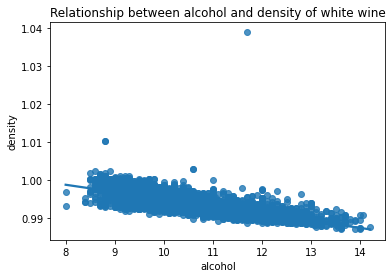

In [48]:
# The plot of relationship between alcohol and density
plt.figure()
sns.regplot(x = 'alcohol',y = 'density',data = white)
plt.title('Relationship between alcohol and density of white wine')

Text(0.5, 1.0, 'The relationship between free sulfur dioxide and total sulfur dioxide')

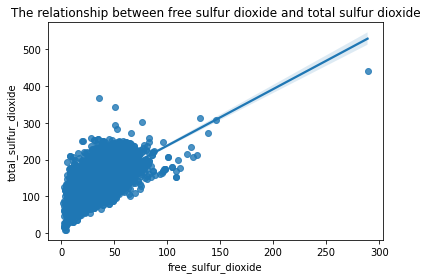

In [49]:
# The plot of relationship between free sulfur dioxide and total sulfur dioxide
plt.figure()
sns.regplot(x = 'free_sulfur_dioxide',y = 'total_sulfur_dioxide',data = white)
plt.title('The relationship between free sulfur dioxide and total sulfur dioxide')

The correlation coefficient matrix shows that density and alcohol have a strong influence on the quality of white wine. 
The following figure shows the relationship between them.

Text(0.5, 1.0, 'Scatter plots of quality, alcohol, and density of white wine')

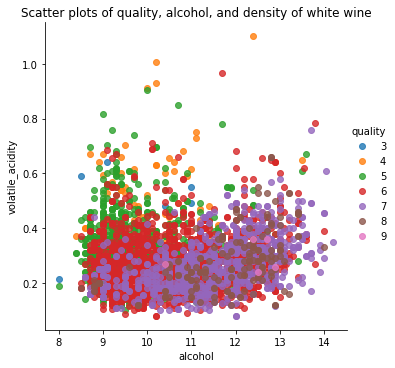

In [23]:
# Scatter plots of quality, alcohol, and density of white wine
sns.lmplot (x = 'alcohol',y = 'volatile_acidity',hue = 'quality',
            data = white,fit_reg = False)
plt.title('Scatter plots of quality, alcohol, and density of white wine')

White wine:

The correlation coefficient matrix shows that density and alcohol have a strong influence on the quality of white wine. The greatest influence on wine quality is the wine is alcohol, which has a correlation coefficient of approximately 0.44.

* Most of the white wines its quality in the middle

* Alcohol is positively correlated with quality, with the higher the degree the higher the quality tends to increase

* Density is negatively correlated with quality, the higher the acidity the lower the quality tends to be

* The higher the alcohol, the lower the density

* The higher the free sulphur dioxide, the higher the total sulphur dioxide




# 2 Closed-form OLS Solution

In [24]:
# Generate a dataset for the regression problem
X,y,coeffs = make_regression(n_samples=1000, n_features=11, coef=True)
print(coeffs)

[27.17057051 99.92909991 95.39376539  6.48698991 97.6467664  57.25326303
  0.         38.27834689 70.75290418 58.0867347  69.11587287]


In [25]:
# The optimal parameters obtained via the closed-form solution
beta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
print(beta)

[ 2.71705705e+01  9.99290999e+01  9.53937654e+01  6.48698991e+00
  9.76467664e+01  5.72532630e+01 -5.32907052e-15  3.82783469e+01
  7.07529042e+01  5.80867347e+01  6.91158729e+01]


In [26]:
np.allclose(beta, coeffs) # Check two arrays are element-wise equal

True

In [27]:
(np.round(coeffs, 8) == np.round(beta, 8)).all() # Check that the first eight digits are the same

True

Potential shortcomings of the closed-form approach:

1. the complexity of the matrix inversion process is large (O(n^3));
2. there are objective functions that are difficult to derive or even have no derivatives;
3. it is possible that given equation has no closed-form solution;
4. we assume that the closed-form objective function is convex. Therefore, it is difficult to cope with the case of non-convex functions.
5. As the noise of the dataset increases, the similarity of coefficient and beta decreases

# 3 Wine Quality Regression

##Ordinary Least-Squares linear regression model

In [50]:
# The Ordinary Least-Squares model to the data

def Wine_Linear_Regression(df):
  # Feature variables
  X = df.drop('quality',axis = 1)
  y = df['quality']
  
  # Splitting data in train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  
  # Creating a pipeline
  pipe = make_pipeline(StandardScaler(),LinearRegression())
  
  # Fitting data into the model
  pipe.fit(X_train, y_train)
  
  # The Mean Squared Error, Mean Absolute Error and the R2 coefficient of determination and report them
  mse = mean_squared_error(y_test, pipe.predict(X_test))
  mae = mean_absolute_error(y_test, pipe.predict(X_test))
  r2 = r2_score(y_test, pipe.predict(X_test)) 
  print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
  print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
  print("The coefficient of determination R^2 on test set: {:.4f}".format(r2))
  
  # Evaluate a score by cross-validation and report it
  cv_score = np.mean(cross_val_score(pipe,X_train,y_train, cv=5))
  print("The training score by cross-validation.: {:.4f}".format(cv_score))

  # Report the training set and test set scores
  print('Training set score: {:.4f}'.format(pipe.score(X_train,y_train)))
  print('Test set score: {:.4f}'.format(pipe.score(X_test, y_test)))

In [71]:
Wine_Linear_Regression(df = red) # The Ordinary Least-Squares model to the red wine

The mean squared error (MSE) on test set: 0.4874
The mean absolute error (MAE) on test set: 0.5346
The coefficient of determination R^2 on test set: 0.3852
The training score by cross-validation.: 0.3329
Training set score: 0.3504
Test set score: 0.3852


In [72]:
Wine_Linear_Regression(df = white) # The Ordinary Least-Squares model to the white wine

The mean squared error (MSE) on test set: 0.5311
The mean absolute error (MAE) on test set: 0.5675
The coefficient of determination R^2 on test set: 0.2929
The training score by cross-validation.: 0.2689
Training set score: 0.2788
Test set score: 0.2929


In [73]:
red_and_white_wine = pd.concat([red,white])
Wine_Linear_Regression(df = red_and_white_wine) # The Ordinary Least-Squares model to the red and white wine

The mean squared error (MSE) on test set: 0.5667
The mean absolute error (MAE) on test set: 0.5791
The coefficient of determination R^2 on test set: 0.2404
The training score by cross-validation.: 0.2996
Training set score: 0.3041
Test set score: 0.2404


## Ridge regression

In [82]:
# Create a function for learning curve
def learning_curve(grid):

  results = pd.DataFrame(grid.cv_results_)
  results.plot('param_alpha', 'mean_train_score')
  results.plot('param_alpha', 'mean_test_score', ax=plt.gca())

  plt.fill_between(results.param_alpha.astype(float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
  plt.fill_between(results.param_alpha.astype(float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
  plt.legend()
  plt.xscale("log")
  plt.title('The learning curves of the alpha on model performance')


In [83]:
# The Ridge Regression model

def Wine_Ridge_Regression(df):
  # Feature variables
  X = df.drop('quality',axis = 1)
  y = df['quality']
  
  # Splitting data in train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  
  # Scaling the X train
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)

  # Find an optimal value for the hyperparameter alpha using grid search.
  param_grid = {'alpha': np.logspace(-3, 3, 7)}
  grid = GridSearchCV(Ridge(max_iter=1000000), param_grid, return_train_score=True, cv=5)
  grid.fit(X_train, y_train)
  alpha = grid.best_params_['alpha']
  print('The best alpha is : {}'.format(alpha))

  # Fit the Ridge regression (l2 regularization)
  ridge = Ridge(alpha= alpha).fit(X_train_scaled, y_train)
  
  # Scaling the X test
  X_test_scaled = scaler.transform(X_test)
  
  # Evaluate a score by cross-validation and report it
  cv_score = np.mean(cross_val_score(ridge,X_train,y_train, cv=5))
  print("The training score by cross-validation.: {:.4f}".format(cv_score))
  
  # Report the training set and test set scores 
  print('Training set score: {:.4f}'.format(ridge.score(X_train_scaled,y_train)))
  print('Test set score: {:.4f}'.format(ridge.score(X_test_scaled, y_test)))
  
  # The learning curves and plots of the choice of alpha on model performance
  learning_curve(grid)


The best alpha is : 0.1
The training score by cross-validation.: 0.3495
Training set score: 0.3649
Test set score: 0.3251


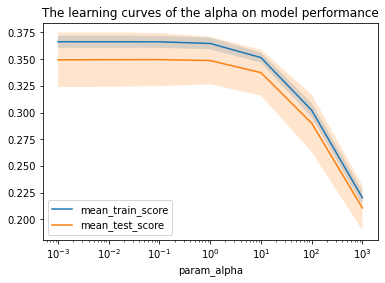

In [84]:
Wine_Ridge_Regression(red) # The Ridge Regression model to the red wine

The best alpha is : 0.001
The training score by cross-validation.: 0.2791
Training set score: 0.2859
Test set score: 0.2625


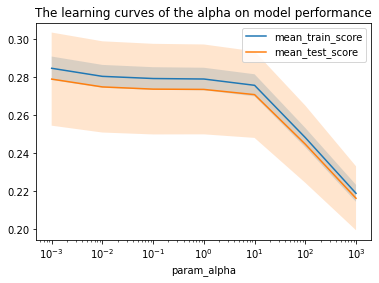

In [85]:
Wine_Ridge_Regression(white) # The Ridge Regression model to the white wine

The best alpha is : 0.001
The training score by cross-validation.: 0.2874
Training set score: 0.2912
Test set score: 0.2936


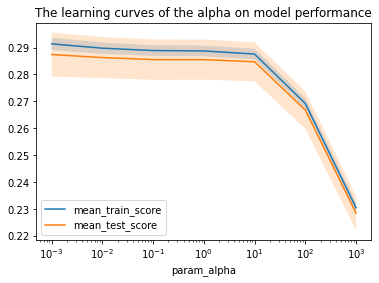

In [86]:
Wine_Ridge_Regression(red_and_white_wine) # The Ridge Regression model to the red and white wine

## Lasso regression

In [59]:
# The Lasso Regression model
def Wine_Lasso_Regression(df):
  # Feature variables
  X = df.drop('quality',axis = 1)
  y = df['quality']
  
  # Splitting data in train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  
  # Scaling the X train  
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  
  # Find an optimal value for the hyperparameter alpha using grid search.
  param_grid = {'alpha': np.logspace(-3, 0, 7)}
  grid = GridSearchCV(Lasso(max_iter=1000000), param_grid, return_train_score=True, cv=5)
  grid.fit(X_train, y_train)
  alpha = grid.best_params_['alpha']
  print('The best alpha is : {}'.format(alpha))
  
  # Fit the Lasso regression (l1 regularization)
  lasso = Lasso(alpha= alpha).fit(X_train_scaled, y_train)
  
  # Scaling the X test
  X_test_scaled = scaler.transform(X_test)

  #Evaluate a score by cross-validation and report it
  cv_score = np.mean(cross_val_score(lasso,X_train,y_train, cv=5))
  print("The training score by cross-validation.: {:.4f}".format(cv_score))
  
  # Report the training set and test set scores   
  print('Training set score: {:.4f}'.format(lasso.score(X_train_scaled,y_train)))
  print('Test set score: {:.4f}'.format(lasso.score(X_test_scaled, y_test)))
  
  # The learning curves and plots of the choice of alpha
  learning_curve(grid)

The best alpha is : 0.001
The training score by cross-validation.: 0.3457
Training set score: 0.3692
Test set score: 0.3149


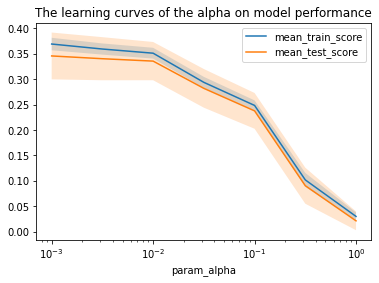

In [88]:
Wine_Lasso_Regression(red) # The Lasso Regression model to the red wine

The best alpha is : 0.001
The training score by cross-validation.: 0.2681
Training set score: 0.2812
Test set score: 0.2821


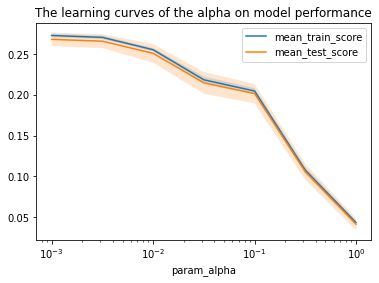

In [89]:
Wine_Lasso_Regression(white) # The Lasso Regression model to the white wine

The best alpha is : 0.001
The training score by cross-validation.: 0.2815
Training set score: 0.2877
Test set score: 0.3090


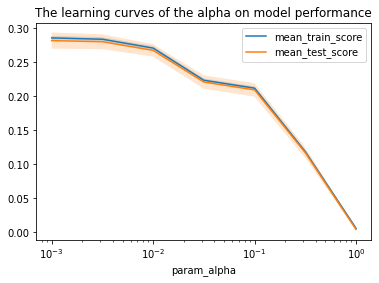

In [90]:
Wine_Lasso_Regression(red_and_white_wine) # The Lasso Regression model to the red and white wine

##Elastic Net regression

In [92]:
def learning_curve_elastic_net(df,grid,param_grid):
  df = pd.DataFrame(grid.cv_results_)
  results = ['mean_test_score','mean_train_score']
  fig, axes = plt.subplots(1, len(param_grid))
  axes[0].set_ylabel('Score')
  
  for idx, (param_name, param_range) in enumerate(param_grid.items()):
    grouped_df = df.groupby(f'param_{param_name}')[results]\
        .agg({'mean_train_score': 'mean',
              'mean_test_score': 'mean'})

    previous_group = df.groupby(f'param_{param_name}')[results]
    axes[idx].set_xlabel(param_name)
    axes[idx].plot(param_range, grouped_df['mean_train_score'], label="Training score")
    axes[idx].plot(param_range, grouped_df['mean_test_score'], label="Test score")
    

  handles, labels = axes[0].get_legend_handles_labels()
  plt.xscale("log")
  fig.suptitle('The learning curves of the alpha and l1 ratio on model performance')
  fig.legend(handles, labels,loc='lower right')

  plt.show()

In [93]:
# The Elastic Net Regression model

def Wine_ElasticNet_Regression(df):
  # Feature variables
  X = df.drop('quality',axis = 1)
  y = df['quality']
  
  # Splitting data in train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  
  # Scaling the X train
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)

  # Find an optimal value for the hyperparameter alpha and l1 ratio using grid search.
  param_grid = {'alpha': np.logspace(-3, 0, 7), 'l1_ratio' :[.1, .5, .7, .9, .95, .99, 1]}
  
  #The choices of l1 ratio:
  #From sklearn documentation:
    # 'Note that a good choice of list of values for l1_ratio is often to put more values close to 1 (i.e. Lasso) and
    # less close to 0 (i.e. Ridge), as in [.1, .5, .7, .9, .95, .99, 1].'

  grid = GridSearchCV(ElasticNet(max_iter=1000000), param_grid, return_train_score=True, cv=5)
  grid.fit(X_train, y_train)
  alpha = grid.best_params_['alpha']
  l1 = grid.best_params_['l1_ratio']
  print('The best alpha is : {}'.format(alpha))
  print('The best l1 ratio is: {}'.format(l1))

  # Fit the Elastic Net regression (l1 and l2 regularization)
  elastic_net = ElasticNet(alpha= alpha,l1_ratio = l1).fit(X_train_scaled, y_train)
  
  # Scaling the X test  
  X_test_scaled = scaler.transform(X_test)
  
  # Evaluate a score by cross-validation and report it
  cv_score = np.mean(cross_val_score(elastic_net,X_train,y_train, cv=5))
  print("The training score by cross-validation.: {:.4f}".format(cv_score))
  
  # Report the training set and test set scores   
  print('Training set score: {:.4f}'.format(elastic_net.score(X_train_scaled,y_train)))
  print('Test set score: {:.4f}'.format(elastic_net.score(X_test_scaled, y_test)))
  
  # The learning curves and plots of the choice of alpha and l1 ratio on model performance 
  learning_curve_elastic_net(df,grid,param_grid)

The best alpha is : 0.001
The best l1 ratio is: 0.1
The training score by cross-validation.: 0.3422
Training set score: 0.3655
Test set score: 0.3242


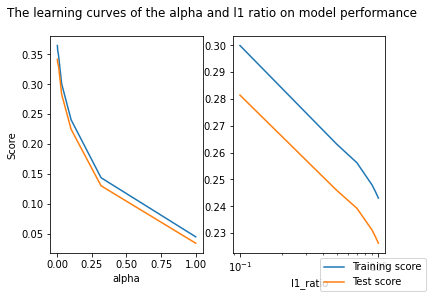

In [94]:
Wine_ElasticNet_Regression(red) # The Elastic Net Regression model to the red wine

The best alpha is : 0.001
The best l1 ratio is: 0.95
The training score by cross-validation.: 0.2646
Training set score: 0.2795
Test set score: 0.2901


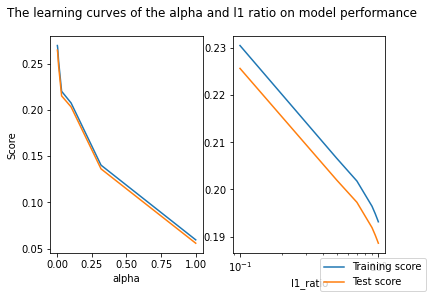

In [95]:
Wine_ElasticNet_Regression(white) # The Elastic Net Regression model to the white wine

The best alpha is : 0.001
The best l1 ratio is: 0.1
The training score by cross-validation.: 0.2919
Training set score: 0.2975
Test set score: 0.2655


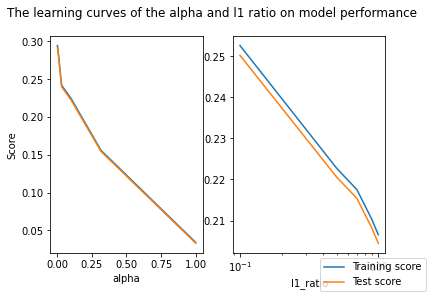

In [96]:
Wine_ElasticNet_Regression(red_and_white_wine) # The Elastic Net Regression model to the red and white wine